<a href="https://colab.research.google.com/github/Kalyan1902/DeepLearning/blob/main/churn_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#ann
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [13]:

dataset = pd.read_csv('/content/drive/MyDrive/data sets/Churn_Modelling(deeplearning).csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
x= dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [15]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
Geography =pd.get_dummies(x['Geography'],drop_first=True)
Gender = pd.get_dummies(x['Gender'],drop_first=True)

In [18]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [19]:
x= pd.concat([x,Geography,Gender],axis=1)

In [20]:
x=x.drop(['Geography','Gender'],axis =1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [22]:
from sklearn.preprocessing  import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)


In [23]:
#part 2 --making of ANN
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [24]:
classifier = Sequential()

In [25]:
#adding input layer and first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [26]:
#adding the second hidden layer
classifier.add(Dense(units=1,kernel_initializer='he_uniform',activation='relu'))


In [27]:
#adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [28]:
#compiling the ANN
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model_history =classifier.fit(x_train,y_train,validation_split =0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6636 - accuracy: 0.7639 - val_loss: 0.6166 - val_accuracy: 0.7883
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5889 - accuracy: 0.7916 - val_loss: 0.5650 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7962 - val_loss: 0.5338 - val_accuracy: 0.7959
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5216 - accuracy: 0.7979 - val_loss: 0.5131 - val_accuracy: 0.7993
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.8024 - val_loss: 0.4969 - val_accuracy: 0.8042
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4885 - accuracy: 0.8099 - val_loss: 0.4850 - val_accuracy: 0.8073
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4764 - accuracy: 0.8147 - val_loss: 0.4761 - val_accuracy: 0.8156

In [30]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

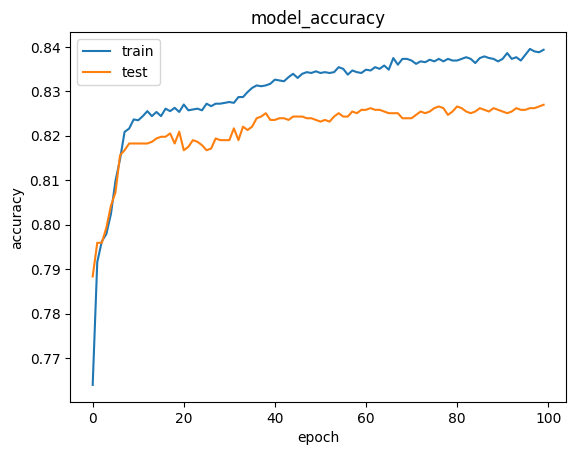

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

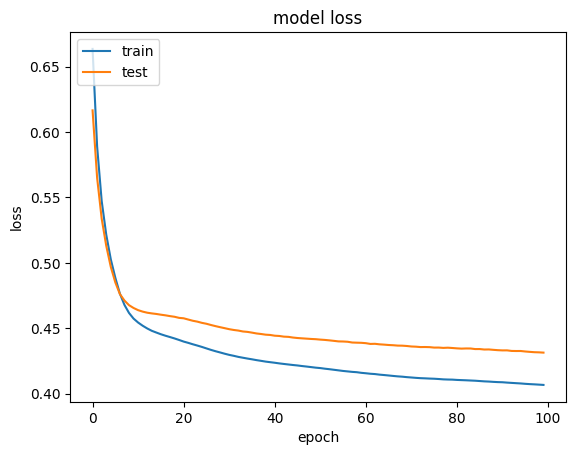

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show

In [33]:
#part 3 -making the predictions and evaluating the model
#predicting the test set results
y_pred =classifier.predict(x_test)
y_pred =(y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1545,   62],
       [ 253,  140]])

In [37]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8425